### Assignment 2 - 16th aug 2022


#### Linear algebra and optimization
#### Question 1

In [31]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt

In [32]:

A=[[9,8,7],[6,5,4]]
B=[[1,2,3],[4,5,6]]

def trans(B):
    Bt=[[0 for i in range(len(B))] for j in range(len(B[0]))]
    for i in range(len(B[0])):
        for j in range(len(B)):
            Bt[i][j]=B[j][i]
    return np.array(Bt)

def mul(A,B):
    C=[[0 for i in range(len(B))] for j in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            sum=0
            for k in range(len(B)):
                sum=sum+(A[i][k]*B[k][j])
            C[i][j]=sum
    return np.array(C)

def inner(A,B):
    C=mul(A,trans(B))
    inner = 0
    for i in range(len(C)):
        inner+=C[i][i]
    return inner

def norm(A):
    normA=0
    for i in range(len(A)):
        for j in range(len(A[0])):
            normA+=A[i][j]*A[i][j]
    normA=math.sqrt(normA)
    return normA

def angle(A,B):
    angle =0;
    angle=math.acos(inner(A,B)/(norm(A)*norm(B)))
    angle=angle*(180/3.14)
    return angle



In [33]:
print(inner(A,B))
print(angle(A,B))

119
40.75201572945418


## Question 2
eigen values and eigen vectors, PSD

In [34]:
A=[[0.5,0],[0,0.5]]
a,b=np.linalg.eig(A)
def findPSD(A):
    eig=True
    for i in a:
        if(i<0):
            eig=False
            break
    return True if eig==True else False

def eigenValues(A):
    return a;
def eigenVectors(A):
    return b;
    
def findDiag(A):
    PSD=True
    for i in range(len(A)):
        for j in range(len(A[0])):
            if(i!=j):
                if(A[i][j]!=0):
                    PSD=False
                    break;
        if(PSD==False):
            break
    return True if PSD else False                  

In [35]:
A=[[0.5,0],[0,0.5]]
print('matrix A is :')
print(A)
print('It is a PSD: ',findPSD(A))
print('Its eigen values are : ',eigenValues(A))
print('------------------')
B=[[9,5],[5,4]]
print('matrix B is :')
print(B)
print('It is a PSD: ',findPSD(B))
print('Its eigen values are : ',eigenValues(B))
print('------------------')
C=[[1,-0.5],[-0.5,1]]
print('matrix C is :')
print(C)
print('It is a PSD: ',findPSD(C))
print('Its eigen values are : ',eigenValues(C))
print('------------------')
D=[[1,-1],[-1,1]]
print(D)
print('It is a PSD: ',findPSD(D))
print('Its eigen values are : ',eigenValues(D))

matrix A is :
[[0.5, 0], [0, 0.5]]
It is a PSD:  True
Its eigen values are :  [0.5 0.5]
------------------
matrix B is :
[[9, 5], [5, 4]]
It is a PSD:  True
Its eigen values are :  [0.5 0.5]
------------------
matrix C is :
[[1, -0.5], [-0.5, 1]]
It is a PSD:  True
Its eigen values are :  [0.5 0.5]
------------------
[[1, -1], [-1, 1]]
It is a PSD:  True
Its eigen values are :  [0.5 0.5]


## Question 3
singular value decomposition

In [36]:

A=[[3,3,2],[2,3,-2]]
def diag(Eig,size1,size2):
    print(Eig)
    diag=np.array([[0 for i in range(size1)] for j in range(size2)])
    print(type(diag))
    for i in range(len(Eig)-1):
       diag[i][i]=(np.sqrt(Eig[i]))
    return diag
        
aat = np.dot(A,trans(A))
ata = np.dot(trans(A),A)
s,u = np.linalg.eig(aat)
s,v = np.linalg.eig(ata)
u1,s1,v1 = np.linalg.svd(A)
for i in range(len(s)):
    s[i]=np.sqrt(s[i])
print(s)
print(v)
print(u)
print(u1)
print(s1)
print(v1)
print(diag(s,len(u[0]),len(v)))

#u,s,vt = svd(A)
#s=diag(s,len(u[0]),len(vt))
#u=np.matrix(u).reshape(len(u),len(u[0]))
#s=np.matrix(s).reshape(len(s),len(s[0]))
#print('u= ',u)
#print(np.dot(u,np.dot(s,vt)))
#print(mul(u,s))
#print(np.array(u).reshape(2,2))
#print(s)
#print(vt)
#print(np.dot(u,np.dot(s,vt)))
#result=mul(np.matrix(u),np.matrix(s))
#print(result)

[5.54801894e+00 7.34624035e-08 2.86696457e+00]
[[ 0.64749817  0.75443354  0.10759258]
 [ 0.7599438  -0.62869461 -0.16501062]
 [ 0.05684667 -0.18860838  0.9804057 ]]
[[ 0.7815437 -0.6238505]
 [ 0.6238505  0.7815437]]
[[ 0.7815437 -0.6238505]
 [ 0.6238505  0.7815437]]
[5.54801894 2.86696457]
[[ 0.64749817  0.7599438   0.05684667]
 [-0.10759258  0.16501062 -0.9804057 ]
 [-0.75443354  0.62869461  0.18860838]]
[5.54801894e+00 7.34624035e-08 2.86696457e+00]
<class 'numpy.ndarray'>
[[2 0]
 [0 0]
 [0 0]]


### Question 4
covariance matrix

In [50]:
df = pd.read_excel(r"C:\Users\Venkatesh Yeturi\OneDrive\Desktop\ml assignments new\Iris assignment 2")
print(df)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]


In [51]:
data  = pd.DataFrame(df)
print(data)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]


In [52]:
covMatrix = data.cov()
print(covMatrix)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       0.685694     -0.039268       1.273682      0.516904
SepalWidthCm       -0.039268      0.188004      -0.321713     -0.117981
PetalLengthCm       1.273682     -0.321713       3.113179      1.296387
PetalWidthCm        0.516904     -0.117981       1.296387      0.582414


In [53]:
evalue,evect = np.linalg.eig(covMatrix)

In [54]:
print(evalue)

[4.22484077 0.24224357 0.07852391 0.02368303]


In [55]:
print(evect)

[[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]


#### Question 5 
#### Probability distributions

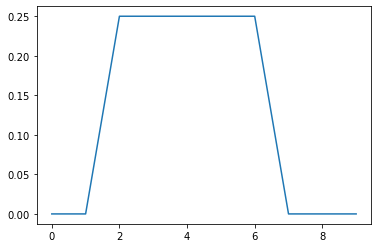

In [56]:
def uniform(a,b):
    return 1/(b-a)
x=np.arange(0,10)
y=uniform(2,6)*np.float16([0,0,1,1,1,1,1,0,0,0])
plt.plot(x,y)


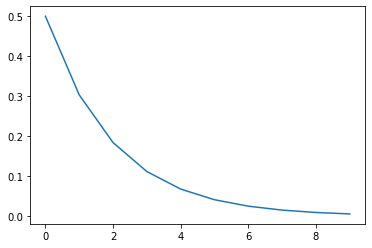

In [57]:
def exponential(x):
    return 0.5*np.exp(-0.5*x)
x=np.arange(0,10)
y=np.float16([1,1,1,1,1,1,1,1,1,1])*exponential(x)
plt.plot(x,y)

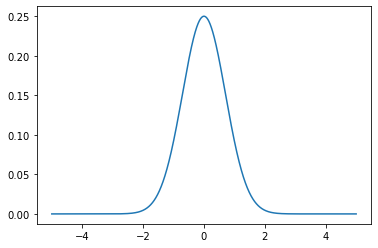

In [58]:
def gaussian(x,sigma):
    return (1/(sigma*(math.sqrt(2*sigma))))*np.exp(-(x*x/(2*sigma)*(2*sigma)))
x=np.linspace(-5,5,5000)
sigma=2
y=gaussian(x,sigma)
plt.plot(x,y)